In [1]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")

In [47]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0, ignore_index = True)
df.shape

(61700, 3)

In [48]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(17788, 3)

In [49]:
# 데이터 중복 유무 확인
df['sentence'].nunique(), df['score'].nunique()

# 중복 제거
df.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플 수 :',len(df))

총 샘플 수 : 17788


In [50]:
def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 4:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [51]:
df = df.dropna(axis=0).reset_index(inplace=False, drop=True) 
df.shape

(17788, 3)

In [52]:
df["y"].value_counts()

1    8894
0    8894
Name: y, dtype: int64

In [53]:
df2 = df[df["y"]==1].head(8894)
df2.head()

,sentence,score,y
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",9,1
1,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,8,1
2,넷플로시청하기에 10점~배우분들 매력 최고,10,1
3,너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다,10,1
4,눈물이 살짝 없는 편이라 걱정했었는데 너무 슬펐다 후반부에 급발진이 심해서 놀라움 ...,10,1


In [54]:
df3 = df[df["y"]==0]
df3.head()

,sentence,score,y
8894,큐브가 훨씬 재미있었던 것 같다,4,0
8895,이걸 영화라고....,1,0
8896,절대 보지 마세요.완전 지루하고 노잼입니다.평점이 도저히 이해가 안갑니다.돈이 너무...,1,0
8897,그렇게 no japan 하고싶냐?,1,0
8898,뛰는 놈 위에 나는 놈 그 위에 보는 놈,4,0


In [55]:
data = pd.concat([df2,df3], axis=0, ignore_index=True)
data.shape

(17788, 3)

In [56]:
data['score'].value_counts().sort_index(ascending=True)

1     3523
2     3032
3      444
4     1895
8     1256
9      847
10    6791
Name: score, dtype: int64

<AxesSubplot:>

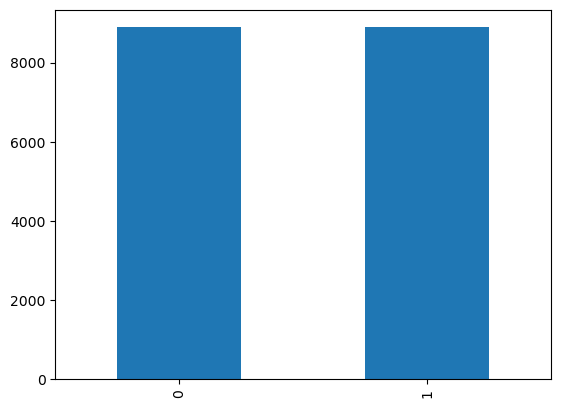

In [57]:
data['y'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [58]:
# 패키지 설치
import pandas as pd
#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')

# Train 데이터 불러오기
train_df = data

# 데이터 확인
print(train_df.head())

                                            sentence  score  y
0                      연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움      9  1
1  나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...      8  1
2                            넷플로시청하기에 10점~배우분들 매력 최고     10  1
3            너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다      10  1
4  눈물이 살짝 없는 편이라 걱정했었는데 너무 슬펐다 후반부에 급발진이 심해서 놀라움 ...     10  1


In [59]:
text = train_df['sentence']
score = train_df['y']

In [60]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(text, score , test_size=0.2, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y))

14230 14230 3558 3558


In [61]:
train_data = pd.concat([train_x, train_y], axis=1).reset_index(inplace=False, drop=True) 
train_data.head()

,sentence,y
0,인간은 원래 사악하지않다. 인간은 사랑스럽고 선한존재이며 착하기까지하다. 그중에 사...,1
1,처음 영화시작하면서 실화를 바탕으로 한 내용이라는 문구보고 아차! 했다아 그얘기구나...,0
2,"발연기, 발연출, 발스토리...",0
3,방금 관람했습니다 산왕전을 애니로볼수있는거자체가 정말 감동이네요 더빙으로봤는데 잼나...,1
4,기대이상의 개꿀잼 ㅋㅋ 이거 꼭봐라 아저씨들,1


In [62]:
test_data = pd.concat([test_x, test_y], axis=1).reset_index(inplace=False, drop=True) 
test_data.head()

,sentence,y
0,오랜만에 가슴이 두근두근,1
1,주연 배우들의 연기 매우 어색하네요. 오히려 조연들이 더 자연스럽습니다.,0
2,어머니가 강수연팬이고 유작이라고 해서 보여줬는데 역대급 똥이네,0
3,"전작에 비해 스토리(=악역이 너무 어이없이 사망, 말안듣는 아이들, 가출한 아이를 ...",0
4,"핵노잼.2시간과 돈, 기부할 생각으로 제발 보셈.다음편 제목은 &amp;#39;협상...",0


In [63]:
print('훈련용 리뷰 개수 :',len(train_data))

훈련용 리뷰 개수 : 14230


In [64]:
print('테스트용 리뷰 개수 :',len(test_data))

테스트용 리뷰 개수 : 3558


In [65]:
print(train_data.groupby('y').size().reset_index(name = 'count'))

   y  count
0  0   7072
1  1   7158


In [66]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
# 한글과 공백을 제외하고 모두 제거
train_data['sentence'] = train_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

,sentence,y
0,인간은 원래 사악하지않다 인간은 사랑스럽고 선한존재이며 착하기까지하다 그중에 사악한...,1
1,처음 영화시작하면서 실화를 바탕으로 한 내용이라는 문구보고 아차 했다아 그얘기구나 ...,0
2,발연기 발연출 발스토리,0
3,방금 관람했습니다 산왕전을 애니로볼수있는거자체가 정말 감동이네요 더빙으로봤는데 잼나...,1
4,기대이상의 개꿀잼 ㅋㅋ 이거 꼭봐라 아저씨들,1


In [68]:
train_data['sentence'] = train_data['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['sentence'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

sentence    24
y            0
dtype: int64


In [69]:
train_data.loc[train_data.sentence.isnull()].head()

,sentence,y
1135,NaN,0
1844,NaN,0
2847,NaN,0
4304,NaN,1
5102,NaN,1


In [70]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

14206


In [71]:
test_data.drop_duplicates(subset = ['sentence'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['sentence'] = test_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['sentence'] = test_data['sentence'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['sentence'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 3555


## 토큰화

In [72]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [73]:
okt = Okt()

X_train = []
for sentence in tqdm(train_data['sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 14206/14206 [01:50<00:00, 128.79it/s]


In [74]:
print(X_train[:3])

[['인간', '원래', '사악하다', '않다', '인간', '사랑스럽다', '선하다', '존재', '이며', '착하다', '그', '중', '사악하다', '인간', '조금', '있다', '뿐이다', '영화', '인간', '사랑', '얼마나', '순수하다', '보여주다', '행복하다', '마음', '머리', '내', '옆', '있다', '내', '아내', '나', '딸', '을', '원', '없이', '평생', '더', '사랑', '하고', '아끼다'], ['처음', '영화', '시작', '실화', '바탕', '내용', '이라는', '문구', '보고', '아차', '그', '얘기', '구나', '나가다', '말다', '번', '고민', '듯'], ['발연기', '발', '연출', '발', '스토리']]


In [75]:
X_test = []
for sentence in tqdm(test_data['sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 3555/3555 [00:29<00:00, 120.70it/s]


## 정수 인코딩

In [76]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [77]:
print(tokenizer.word_index)

{'보다': 1, '영화': 2, '을': 3, '없다': 4, '너무': 5, '이다': 6, '있다': 7, '좋다': 8, '연기': 9, '로': 10, '되다': 11, '다': 12, '배우': 13, '감동': 14, '만': 15, '스토리': 16, '같다': 17, '에서': 18, '적': 19, '진짜': 20, '않다': 21, '아니다': 22, '것': 23, '만들다': 24, '재밌다': 25, '나오다': 26, '안': 27, '그': 28, '시간': 29, '생각': 30, '그냥': 31, '더': 32, '가다': 33, '연출': 34, '고': 35, '정말': 36, '감독': 37, '게': 38, '인': 39, '나': 40, '왜': 41, '못': 42, '내': 43, '사람': 44, '아깝다': 45, '자다': 46, '말': 47, '최고': 48, '하고': 49, '싶다': 50, '보고': 51, '수': 52, '들다': 53, '내용': 54, '까지': 55, '님': 56, '때': 57, '모르다': 58, '이렇다': 59, '요': 60, '장면': 61, '돈': 62, '정도': 63, '점': 64, '눈물': 65, '하나': 66, '재미': 67, '느낌': 68, '오다': 69, '알다': 70, '마지막': 71, '꼭': 72, '볼': 73, '거': 74, '안되다': 75, '그렇다': 76, '슬램덩크': 77, '분': 78, '평점': 79, '다시': 80, '부터': 81, '아': 82, '작품': 83, '처음': 84, '임': 85, '지루하다': 86, '영': 87, '아쉽다': 88, 'ㅠㅠ': 89, '뭐': 90, '중': 91, '많다': 92, '주다': 93, '지': 94, '느끼다': 95, '이렇게': 96, '중간': 97, '인데': 98, '재미있다': 99, '많이': 100, '뻔하다': 101, '뮤지컬': 1

In [78]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14125
등장 빈도가 1번 이하인 희귀 단어의 수: 6234
단어 집합에서 희귀 단어의 비율: 44.134513274336285
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.732963911198401


In [79]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7892


In [80]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [81]:
print(X_train[:3])

[[286, 791, 5803, 21, 286, 2563, 3227, 574, 792, 2129, 28, 91, 5803, 286, 248, 7, 1212, 2, 286, 160, 424, 1678, 230, 441, 182, 839, 43, 772, 7, 43, 1440, 40, 635, 3, 611, 139, 1152, 32, 160, 49, 1679], [84, 2, 200, 497, 1319, 54, 324, 51, 5804, 28, 474, 2747, 498, 176, 128, 662, 124], [944, 1213, 34, 1213, 16]]


In [82]:
y_train = np.array(train_data['y'])
y_test = np.array(test_data['y'])

## 빈 샘플(empty samples) 제거

In [83]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [84]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

14200
14200


## 패딩

리뷰의 최대 길이 : 299
리뷰의 평균 길이 : 15.624647887323944


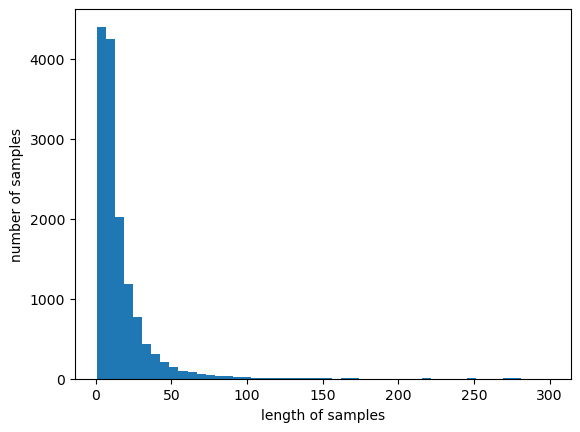

In [85]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [86]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [87]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 95.88028169014085


In [88]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## LSTM으로 네이버 영화 리뷰 감성 분류하기

In [89]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
177/178 [============================>.] - ETA: 0s - loss: 0.5027 - acc: 0.7545
Epoch 1: val_acc improved from -inf to 0.85070, saving model to best_model.h5
178/178 [==============================] - 15s 74ms/step - loss: 0.5020 - acc: 0.7548 - val_loss: 0.3429 - val_acc: 0.8507
Epoch 2/15
177/178 [============================>.] - ETA: 0s - loss: 0.2851 - acc: 0.8836
Epoch 2: val_acc improved from 0.85070 to 0.86268, saving model to best_model.h5
178/178 [==============================] - 12s 68ms/step - loss: 0.2850 - acc: 0.8835 - val_loss: 0.3208 - val_acc: 0.8627
Epoch 3/15
177/178 [============================>.] - ETA: 0s - loss: 0.2180 - acc: 0.9140
Epoch 3: val_acc improved from 0.86268 to 0.86373, saving model to best_model.h5
178/178 [==============================] - 12s 69ms/step - loss: 0.2175 - acc: 0.9143 - val_loss: 0.3215 - val_acc: 0.8637
Epoch 4/15
177/178 [============================>.] - ETA: 0s - loss: 0.1869 - acc: 0.9300
Epoch 4: val_acc improved f

In [90]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

112/112 [==============================] - 2s 11ms/step - loss: 0.3243 - acc: 0.8709

 테스트 정확도: 0.8709


In [91]:
with open('tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

## 리뷰 예측해보기

In [93]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    
sentiment_predict(input('감성분석할 문장을 입력해 주세요.: '))

감성분석할 문장을 입력해 주세요.:  영화가 참 재밌네요


1/1 [==============================] - 0s 78ms/step
90.83% 확률로 긍정 리뷰입니다.

